# Introduction of our Project-
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


# Problem Statement-
**We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.**


# Let's Start the project with importing Libraries-

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,load_img  # For Data Augmentation purpose and load image
from tensorflow.keras.models import Sequential                                       # Since CNN use sequencial filteration
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,Input # To set the layers and activation function
from tensorflow.keras.layers import Conv2D,MaxPooling2D

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input # For preprocessing after applying InceptionV3

import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from glob import glob
from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback  # A live training loss plot in Jupyter Notebook for Keras, PyTorch and other frameworks.

In [3]:
print(tf.__version__)

2.6.0


# Here we will use Inception V3(Transfer Learning technique)-
**Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset.
The model itself is made up of symmetric and asymmetric building blocks, including convolutions, average pooling, max pooling, concats, dropouts, and fully connected layers. Batchnorm is used extensively throughout the model and applied to activation inputs. Loss is computed via Softmax.**

In [4]:
# Now at first we will resize all the images because for inseptionV3 image size is 224,224

IMAGE_SIZE = [224, 224]    

# Now we will see the total number of different category images of Train and Test set-

In [5]:
# The total number of Training images of all category present in Training set-

for expression in os.listdir("C:/Users/user/Desktop/DEEP LREARNING PROJECT/train/"):
    print(str(len(os.listdir("C:/Users/user/Desktop/DEEP LREARNING PROJECT/train/" + expression))) + " " + expression + " images")

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


In [6]:
# The total number of Training images of all category present in Test set-


for expression in os.listdir("C:/Users/user/Desktop/DEEP LREARNING PROJECT/test/"):
    print(str(len(os.listdir("C:/Users/user/Desktop/DEEP LREARNING PROJECT/test/" + expression))) + " " + expression + " images")

958 angry images
111 disgust images
1024 fear images
1774 happy images
1233 neutral images
1247 sad images
831 surprise images


# For inseptionV3 we will add RGB channel because we will have colourful images to detect and will also remove the last layer to use this Transfter Learning technique for Emotion recognition-

In [7]:
# Adding the RGB cahnnel
# using 'imagenet' weights
# Removing the last layer

inception = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [8]:
# Now we don't need to train the inseptionV3 layers because the layers are already traing in many images-

for layer in inception.layers:
    layer.trainable = False

In [9]:
# This folder contain all the categories of our training set-

folders = glob('C:/Users/user/Desktop/DEEP LREARNING PROJECT/train/*')

In [10]:
# Now flatteniing the last layer of our code-

x = Flatten()(inception.output)

# Now the dence layer we will creat which will have all the categories and will use 'sigmoid' activation function there-

prediction = Dense(len(folders), activation='sigmoid')(x)

# creating a model object

model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# viewing the structure of our model -

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Now to compile the model We will use 'Adam' optimizer here-
**Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.**
**Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:**
* Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
* Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).


In [12]:
# cost and optimization methods -
model.compile(loss='categorical_crossentropy',   # since we have 7 categorical outputs we are using 'categorical_crossentropy' 
              optimizer='adam',                  # Optimizer
              metrics=['accuracy'])              # Performance matric

# Now we will apply Data Augmentation-
**Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.**

In [13]:
# Image Data Generator to import the images from the dataset for Data Augmentation -

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Now we will see the total number of images after Data Augmentation-

In [14]:
training_set = train_datagen.flow_from_directory('C:/Users/user/Desktop/DEEP LREARNING PROJECT/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [15]:
test_set = test_datagen.flow_from_directory('C:/Users/user/Desktop/DEEP LREARNING PROJECT/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


# Now finally after setting some Callbacks we will run our model and will check the accuracy

## Callbacks- 
**A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).**
## Reduce Learning Rate-
**Reduce learning rate when a metric has stopped improving.Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.**
## Checkpoint-
**Callback to save the Keras model or model weights at some frequency.'ModelCheckpoint' callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.**


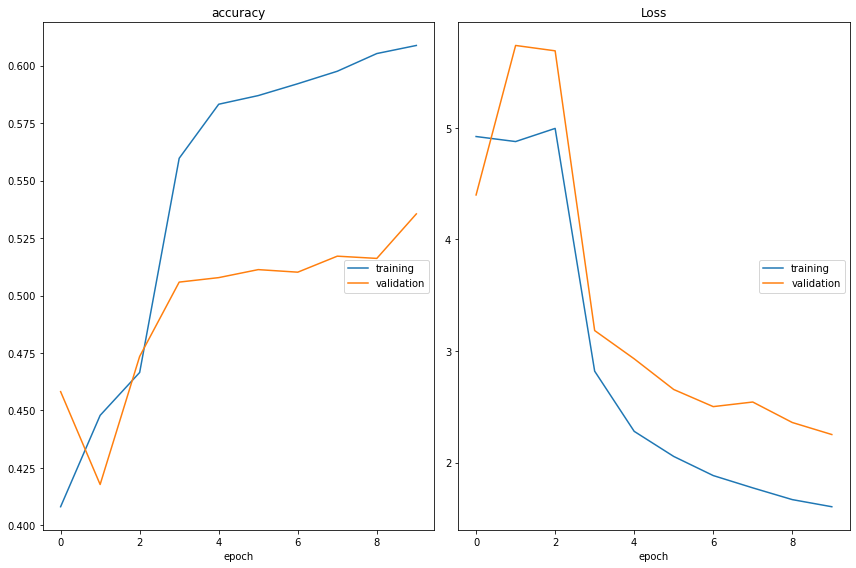

accuracy
	training         	 (min:    0.408, max:    0.609, cur:    0.609)
	validation       	 (min:    0.418, max:    0.536, cur:    0.536)
Loss
	training         	 (min:    1.604, max:    4.994, cur:    1.604)
	validation       	 (min:    2.251, max:    5.737, cur:    2.251)

Epoch 00010: saving model to model.h5


In [17]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

# Here We will save our model weights in 'model.h5' file.
    
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(training_set,
                    validation_data=test_set,
                    epochs=10,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set),
                    callbacks=callbacks)